### 0. Exploratory Analysis on sales.csv

Data Source: https://www.kaggle.com/datasets/c176ea9433a34b5731d596e62802ceec400fb1e39da98d2958d1938d721877d4?select=sales.csv

Data Description: The dataset contains all creations (tokens.csv), bids (bids.csv) and sales (sales.csv) of artworks tokenized on crypto art gallery SuperRare from April 2018. The tokens table contains the text metadata and the links to the media objects on IPFS. The sales_data are acquired from the Ethereum blockchain using Etherscan API.

Goal: use graph analysis to predict NFT prices

Note: Pyvis sections only works when I run the cells in jupyter notebook




#### Part 1 Dataset EDA

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
#pd.set_option('display.max_colwidth', 20)    # narrow columns

import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/CS142 Network/dataset_SuperRare")
!ls /content/drive/MyDrive/'CS142 Network'/dataset_SuperRare

#on-colab Dataframe loading
sales_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/sales.csv")
art_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/tokens.csv")
bids_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/bids.csv")


Mounted at /content/drive
bids.csv     main.ipynb  sales.csv     tokens.csv
bids.gsheet  my_util.py  sales.gsheet


'\nsales_data_array = []\nbids_data_array = []\n\nwith open("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/sales.csv") as ff:\n  lines = ff.readlines()\nwith open("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/sales.csv") as ff:\n  lines = ff.readlines()\n'

In [3]:
print(sales_data.shape)
sales_data.head()

(17529, 9)


,timestamp,tokenId,buyer,seller,eth,rate,usd,contract,transactionId
0,2018-04-05T23:50:12Z,1,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf1097e3617632e43b7c0a46ffeb4d741d0a67b25fb06...
1,2020-01-18T16:16:42Z,1,0x54d7f921785ebe46010d83c73712e80dfaff1e81,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,75.00,174.00,13050.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf8d3b8be83601d0351c72d2093738a4a25c70b49503b...
2,2021-01-05T00:47:24Z,1,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,0x54d7f921785ebe46010d83c73712e80dfaff1e81,100.00,1103.19,110319.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xc917fe7d09a750c09fd8f467d60e5adac4bbd3a5e5ea...
3,2018-04-05T23:59:06Z,2,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x9e9befc01fe11425ae8a2b903c8f8e1ec9777157d3e9...
4,2018-09-05T21:06:04Z,2,0x6853a596d6d7264d3622546da3b891b6fe17eb82,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,1.85,228.27,422.2995,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x6425dbd16550508c7c0ca320a1e6d7cb2ba2d3b2aea5...


In [4]:
print(art_data.shape)
art_data.head()

(22232, 14)


,tokenId,name,description,tags,image,media,type,size,dimensions,creator,owner,timestamp,contract,transactionId
0,1,AI Generated Nude Portrait #1,"Robbie Barrat, AI Generated, 2018",Nude Portrait AI Painting Portrait Generat...,https://ipfs.pixura.io/ipfs/QmX4ECCmA4HZSPxzsg...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,2018-04-05T23:20:48Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf3e68d3a53b1bb3a2cdb4aa3a6c871626e6dcf7b8df1...
1,2,AI Generated Nude Portrait #2,"Robbie Barrat, AI Generated, 2018",Nude Portrait AI Painting Portrait Generat...,https://ipfs.pixura.io/ipfs/QmRe3WvttmMR7mELga...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0x6853a596d6d7264d3622546da3b891b6fe17eb82,2018-04-05T23:49:27Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x8fb08cb45e1a0032dccd0951812dba7a8ebe5b255bdd...
2,3,AI Generated Nude Portrait #3,"Robbie Barrat, AI Generated, 2018",Nude Portrait AI Painting Portrait Generat...,https://ipfs.pixura.io/ipfs/QmYCyvs9JwKTAChpri...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0x8a0a834077a8ecea4983e2288f81afb2c6764116,2018-04-06T00:07:31Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xdf2952f467fddc9f81f6beada8dc2bed1ae4e497c0d2...
3,4,AI Generated Nude Portrait #4,"Robbie Barrat, AI Generated, 2018",Nude Portrait AI Painting Portrait Generat...,https://ipfs.pixura.io/ipfs/Qmar9LZwD1DAVbYe7h...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xc6d21ad879faadba2fd07db6a599fa0cb6b8505d,2018-04-06T00:09:04Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x29b61df06bc7cd50df888cedb8947162733083fb6a23...
4,5,Echoes of a Dead Earth,"XCOPY, 2018",XCOPY GIF Earth Echoes 2018,https://ipfs.pixura.io/ipfs/QmQnek3m4UtBQxqsqJ...,NaN,NaN,NaN,NaN,0x39cc9c86e67baf2129b80fe3414c397492ea8026,0xe25c73435702fed11e9c5584ce6efe7cbff71739,2018-04-07T20:44:24Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xd21c6838f94842d3824e800c84a578e7a61cddcfca9a...


In [5]:
print(bids_data.shape)
bids_data.head()

(51640, 8)


,timestamp,tokenId,bidder,eth,rate,usd,contract,transactionId
0,2018-04-16T18:11:00Z,1,0x388f16be771be7392ae0e11422951620ec4555c3,0.001,511.67,0.51167,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xb03cb308ed7b397e9c95fd66dfa2574cf1e12f0a5cb1...
1,2018-04-16T18:58:27Z,1,0x3950cf9d61851259b0694a0a3800f51658cb920a,0.470,511.67,240.48490,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x034a179079157243bfd2d60486cbc0ad94e2fd2a4418...
2,2018-04-17T00:33:27Z,1,0x337101def3eeb6f06e071efe02216274507937bb,0.475,503.03,238.93925,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xde7bf8fbc62fa211ff4dfc966460437b8018f841bacc...
3,2018-05-06T19:30:24Z,1,0x3950cf9d61851259b0694a0a3800f51658cb920a,0.470,790.39,371.48330,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x96cbaa6de5c4593c9db6cd219ebec297a1e0098d4e5e...
4,2018-05-19T21:59:45Z,1,0x55372173689c288552885d897d32f5f706f79aa6,0.500,696.05,348.02500,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf483fe1b7a693c40d19a916f91692face2003d125e55...


In [6]:
### merge sales data with token data so we can see artwork attributes
sales_token = sales_data.merge(art_data, left_on = "tokenId", right_on = "tokenId")
print(sales_token.shape)
sales_token

(17532, 22)


,timestamp_x,tokenId,buyer,seller,eth,rate,usd,contract_x,transactionId_x,name,...,image,media,type,size,dimensions,creator,owner,timestamp_y,contract_y,transactionId_y
0,2018-04-05T23:50:12Z,1,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf1097e3617632e43b7c0a46ffeb4d741d0a67b25fb06...,AI Generated Nude Portrait #1,...,https://ipfs.pixura.io/ipfs/QmX4ECCmA4HZSPxzsg...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,2018-04-05T23:20:48Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf3e68d3a53b1bb3a2cdb4aa3a6c871626e6dcf7b8df1...
1,2020-01-18T16:16:42Z,1,0x54d7f921785ebe46010d83c73712e80dfaff1e81,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,75.00,174.00,13050.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf8d3b8be83601d0351c72d2093738a4a25c70b49503b...,AI Generated Nude Portrait #1,...,https://ipfs.pixura.io/ipfs/QmX4ECCmA4HZSPxzsg...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,2018-04-05T23:20:48Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf3e68d3a53b1bb3a2cdb4aa3a6c871626e6dcf7b8df1...
2,2021-01-05T00:47:24Z,1,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,0x54d7f921785ebe46010d83c73712e80dfaff1e81,100.00,1103.19,110319.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xc917fe7d09a750c09fd8f467d60e5adac4bbd3a5e5ea...,AI Generated Nude Portrait #1,...,https://ipfs.pixura.io/ipfs/QmX4ECCmA4HZSPxzsg...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,2018-04-05T23:20:48Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf3e68d3a53b1bb3a2cdb4aa3a6c871626e6dcf7b8df1...
3,2018-04-05T23:59:06Z,2,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x9e9befc01fe11425ae8a2b903c8f8e1ec9777157d3e9...,AI Generated Nude Portrait #2,...,https://ipfs.pixura.io/ipfs/QmRe3WvttmMR7mELga...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0x6853a596d6d7264d3622546da3b891b6fe17eb82,2018-04-05T23:49:27Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x8fb08cb45e1a0032dccd0951812dba7a8ebe5b255bdd...
4,2018-09-05T21:06:04Z,2,0x6853a596d6d7264d3622546da3b891b6fe17eb82,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,1.85,228.27,422.2995,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x6425dbd16550508c7c0ca320a1e6d7cb2ba2d3b2aea5...,AI Generated Nude Portrait #2,...,https://ipfs.pixura.io/ipfs/QmRe3WvttmMR7mELga...,NaN,NaN,NaN,NaN,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0x6853a596d6d7264d3622546da3b891b6fe17eb82,2018-04-05T23:49:27Z,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x8fb08cb45e1a0032dccd0951812dba7a8ebe5b255bdd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2021-03-25T23:48:06Z,22179,0x6641f026da7cc01ce6ff5a55355f64f6345aa499,0x7177b44fcf24ea77b7285ba85055bce7db8b5b13,1.20,1588.34,1906.0080,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x07a6e96473a958e6ed8e49821b80e8bddf713a033868...,The night shift.,...,https://ipfs.pixura.io/ipfs/QmPkq5r4QfiLHKkmP8...,https://ipfs.pixura.io/ipfs/QmPkq5r4QfiLHKkmP8...,image/jpeg,28908661.0,4906x5187,0x7177b44fcf24ea77b7285ba85055bce7db8b5b13,0x6641f026da7cc01ce6ff5a55355f64f6345aa499,2021-03-25T23:13:03Z,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x0dc96e8a9aa94e85a9095c3489425c124a4769663362...
17528,2021-03-26T07:26:39Z,22182,0xa54b343d5e65cadea794445452d1779bac2e7f40,0xb7ae801d15a727dc975282aee2060eb88d2787f7,0.50,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x49be0967a667d04ac764ef8c94a709ba47d3850fa7a9...,RE165105522 4,...,https://ipfs.pixura.io/ipfs/QmdSttNBbbnpRJoPeX...,https://ipfs.pixura.io/ipfs/QmdSttNBbbnpRJoPeX...,image/png,4574183.0,2331x2331,0xb7ae801d15a727dc975282aee2060eb88d2787f7,0xa54b343d5e65cadea794445452d1779bac2e7f40,2021-03-25T23:39:37Z,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e

In [7]:
# highest sales in USD
sales_token[["tokenId", "eth", "rate", "usd", "name"]].sort_values("usd", ascending = False).head()

,tokenId,eth,rate,usd,name
24,14,1000.0,1583.24,1583240.00,Death Dip
17279,21383,288.0,1823.03,525032.64,Mars House
9626,10497,250.0,1682.05,420512.50,Hope
10876,11988,195.0,1767.77,344715.15,Overthinking Again
27,16,150.0,1776.16,266424.00,Post Debt


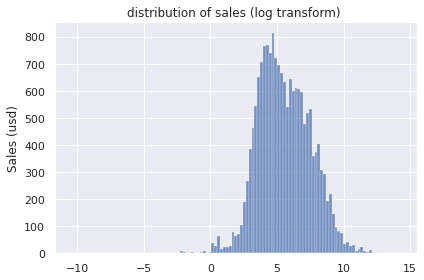

In [8]:
plt.figure()
sns.histplot(np.log(sales_data["usd"].to_list()))
plt.ylabel("Sales (usd)")
plt.title("distribution of sales (log transform) ")
plt.tight_layout()

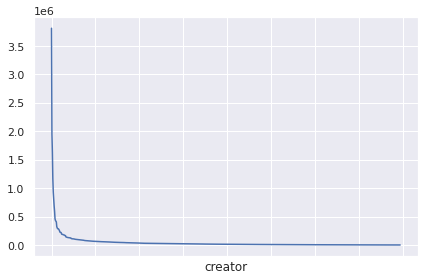

In [9]:
# https://www.kaggle.com/code/giovanni1085/getting-started
# top artists by sale volume
sales_data.merge(art_data, left_on="tokenId", right_on="tokenId")[["tokenId","eth","rate","usd","name","creator"]] \
    .groupby("creator")["usd"] \
    .agg(sum) \
    .sort_values(ascending=False) \
    .plot()
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.yscale('linear') # try 'log'
plt.tight_layout()

In [10]:
sales_data.describe()

,tokenId,eth,rate,usd
count,17529.000000,1.752900e+04,17479.000000,1.747900e+04
mean,9974.864624,2.071714e+00,616.508927,1.992631e+03
std,6090.362047,1.001823e+01,615.808092,1.553975e+04
min,1.000000,1.000000e-07,83.900000,2.854800e-05
25%,4818.000000,2.500000e-01,184.200000,6.105500e+01
50%,9553.000000,6.000000e-01,337.450000,2.167350e+02
75%,14826.000000,1.650000e+00,1088.370000,1.013008e+03
max,22230.000000,1.000000e+03,1957.470000,1.583240e+06


In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      17529 non-null  object 
 1   tokenId        17529 non-null  int64  
 2   buyer          17529 non-null  object 
 3   seller         17529 non-null  object 
 4   eth            17529 non-null  float64
 5   rate           17479 non-null  float64
 6   usd            17479 non-null  float64
 7   contract       17529 non-null  object 
 8   transactionId  17529 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.2+ MB


In [12]:
# Data type conversions
sales_data['timestamp'] = sales_data['timestamp'].astype('datetime64[ns]')
sales_data.dtypes
#sales_data

timestamp        datetime64[ns]
tokenId                   int64
buyer                    object
seller                   object
eth                     float64
rate                    float64
usd                     float64
contract                 object
transactionId            object
dtype: object

In [13]:
# another method to convert timestamp object to datetime type
sales_data['timestamp']=pd.to_datetime(sales_data['timestamp'])
sales_data

,timestamp,tokenId,buyer,seller,eth,rate,usd,contract,transactionId
0,2018-04-05 23:50:12,1,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf1097e3617632e43b7c0a46ffeb4d741d0a67b25fb06...
1,2020-01-18 16:16:42,1,0x54d7f921785ebe46010d83c73712e80dfaff1e81,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,75.00,174.00,13050.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf8d3b8be83601d0351c72d2093738a4a25c70b49503b...
2,2021-01-05 00:47:24,1,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,0x54d7f921785ebe46010d83c73712e80dfaff1e81,100.00,1103.19,110319.0000,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xc917fe7d09a750c09fd8f467d60e5adac4bbd3a5e5ea...
3,2018-04-05 23:59:06,2,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.46,381.36,175.4256,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x9e9befc01fe11425ae8a2b903c8f8e1ec9777157d3e9...
4,2018-09-05 21:06:04,2,0x6853a596d6d7264d3622546da3b891b6fe17eb82,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,1.85,228.27,422.2995,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x6425dbd16550508c7c0ca320a1e6d7cb2ba2d3b2aea5...
...,...,...,...,...,...,...,...,...,...
17524,2021-03-25 23:48:06,22179,0x6641f026da7cc01ce6ff5a55355f64f6345aa499,0x7177b44fcf24ea77b7285ba85055bce7db8b5b13,1.20,1588.34,1906.0080,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x07a6e96473a958e6ed8e49821b80e8bddf713a033868...
17525,2021-03-26 07:26:39,22182,0xa54b343d5e65cadea794445452d1779bac2e7f40,0xb7ae801d15a727dc975282aee2060eb88d2787f7,0.50,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x49be0967a667d04ac764ef8c94a709ba47d3850fa7a9...
17526,2021-03-26 05:55:00,22206,0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac,0x68f0114d8bd222e816843aa2f52aede00d8e2c22,8.88,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x4ebff4a57e9a57735a28eae05c00f08e8efd9735ec84...
17527,2021-03-26 09:03:24,22215,0x576a655161b5502dcf40602be1f3519a89b71658,0x16aac3c06f7e4da97c29d0f14126517e37b9f43f,0.50,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0xb823b737b3e964f096f96f9903fcd4b7145c993ecd74...


In [14]:
df = pd.DataFrame(sales_data, columns = ["timestamp", "tokenId", "usd"])
df

,timestamp,tokenId,usd
0,2018-04-05 23:50:12,1,175.4256
1,2020-01-18 16:16:42,1,13050.0000
2,2021-01-05 00:47:24,1,110319.0000
3,2018-04-05 23:59:06,2,175.4256
4,2018-09-05 21:06:04,2,422.2995
...,...,...,...
17524,2021-03-25 23:48:06,22179,1906.0080
17525,2021-03-26 07:26:39,22182,NaN
17526,2021-03-26 05:55:00,22206,NaN
17527,2021-03-26 09:03:24,22215,NaN


In [15]:
pd.DataFrame(art_data.groupby(by = "type", dropna = False).count()["tokenId"])

,tokenId
type,
image/apng,6
image/gif,2650
image/jpeg,3292
image/png,3047
image/svg+xml,27
model/gltf-binary,261
video/mp4,4343
video/webm,26
NaN,8580


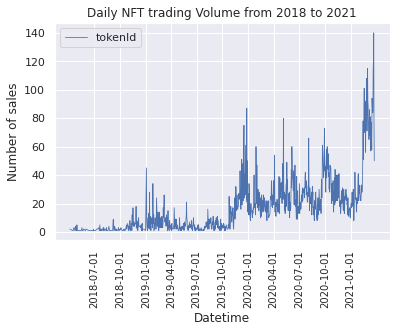

In [16]:
df1 =  pd.DataFrame(df.groupby(by = df['timestamp'].dt.date)["tokenId"].count())

df1.plot(linewidth = 0.8)
xticks = pd.date_range(datetime.datetime(2018,4,5), datetime.datetime(2021,3,26), freq='QS')
plt.xticks(xticks, rotation = 90, fontsize=10)
plt.title("Daily NFT trading Volume from 2018 to 2021")
plt.xlabel("Datetime")
plt.ylabel("Number of sales")
plt.show()

Text(0.5, 1.0, 'Daily Sales Volume from 2018 to 2021 (millions usd)')

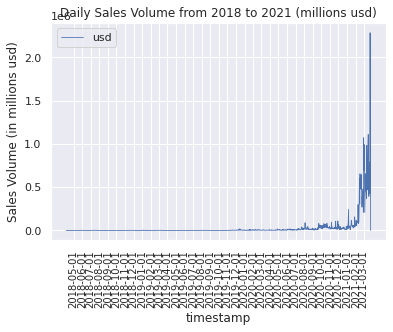

In [17]:
# frequency tags: https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

df2 = pd.DataFrame(df.groupby(by = df['timestamp'].dt.date)["usd"].sum())
df2.plot(linewidth = 0.8)
xticks = pd.date_range(datetime.datetime(2018,4,5), datetime.datetime(2021,3,26), freq='MS')
plt.xticks(xticks, rotation = 90, fontsize=10)
plt.ylabel("Sales Volume (in millions usd)")
plt.title("Daily Sales Volume from 2018 to 2021 (millions usd)")

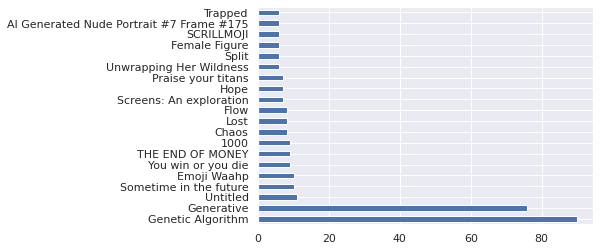

In [18]:
# plot the most traded tokens
sales_token['name'].value_counts()[:20].plot(kind='barh')

In [19]:
# rank buyers by transactions
sales_data.buyer.value_counts()

0xe703f231ab056ecb99c92a1232cc1020acfc72f8    594
0xd2af803ad747ea12acf5ae468056703ae48785b5    501
0xf52393e120f918ffba50410b90a29b1f8250c879    443
0x5da7351a4cb03c33e11f51841bc614d985812821    373
0xdc19d539369c3da9172de453c05bc503c9ac6bc2    343
                                             ... 
0xb757872560ae94d385ac274cbed43168d91d46d7      1
0x45bc90fa422b90d83c6275d889800d3123af8a7c      1
0x4e4da5abb3c4e27db723db8f543c2f6794c6a212      1
0x1de47791e217103aba1ca9ba4ba4a551be5163b9      1
0x958f6b67f61b0169a4c8f9e4c1c9637886e5035a      1
Name: buyer, Length: 2369, dtype: int64

In [20]:
# group wealth by buyer
df = pd.DataFrame(sales_data.groupby(sales_data.buyer).sum()['usd'])
df
# plot histogram of sale volume spent by buyers


,usd
buyer,
0x0009496089663f37f17db030423c373ea4266a26,3650.575000
0x00121a3d3470a1175afbcf9f535855f2aa03b741,368.360400
0x00362d9f53023ee0fde44773c3fa79917adb094b,1721.480000
0x003f6b20bfa4b5cab701960ecf73859cb3c095fc,285.372000
0x0055cd5f017027d10adf4f13332181e6d8d886bb,4734.180000
...,...
0xff52319f6e041a63565413a445f2c105f66255b6,132.160000
0xff6ddb157773197c31a834f6a294c7d0c0abc79f,253.084200
0xff7197d0aaec7ae574d83788782698f793f6ff01,156.865000


#### Part 2 Graph

In [26]:
# install pyvis for interactive graph visualization
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 28.4 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 59.8 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=775783152a38200e33f34b08057e4f1db5cbc48fd6ede648136c2eec84d63427
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


##### Undirected Graph: Transaction Network

In [21]:
relationship_df = sales_data[["buyer", "seller"]]
# this method is for an undirected graph: transactions between buyers and sellers
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["buyer", "seller"], sort = False, as_index = False).sum()
relationship_df

,buyer,seller,value
0,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,6
1,0x54d7f921785ebe46010d83c73712e80dfaff1e81,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,1
2,0x54d7f921785ebe46010d83c73712e80dfaff1e81,0xd0c0650cd08acd4e9553c48c60c94be04fecce43,1
3,0x6853a596d6d7264d3622546da3b891b6fe17eb82,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,1
4,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0xf52393e120f918ffba50410b90a29b1f8250c879,1
...,...,...,...
11216,0x958f6b67f61b0169a4c8f9e4c1c9637886e5035a,0xd932009691c6e86de80501da84ec7febd278ead9,1
11217,0x6641f026da7cc01ce6ff5a55355f64f6345aa499,0x7177b44fcf24ea77b7285ba85055bce7db8b5b13,1
11218,0xa54b343d5e65cadea794445452d1779bac2e7f40,0xb7ae801d15a727dc975282aee2060eb88d2787f7,1
11219,0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac,0x68f0114d8bd222e816843aa2f52aede00d8e2c22,1


In [22]:
G1 = nx.from_pandas_edgelist(relationship_df, source = "buyer", target = "seller", edge_attr = "value", create_using = nx.Graph())

In [23]:
print(nx.info(G1))
print("number of connected components: ", nx.number_connected_components(G1))

Graph with 3052 nodes and 11221 edges
number of connected components:  34


In [24]:
node_degree = dict(G1.degree())
nx.set_node_attributes(G1, node_degree, 'size')

/var/folders/ks/myyrbw990ps2wwgnlcsd6scc0000gn/T/ipykernel_1648/1297250113.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


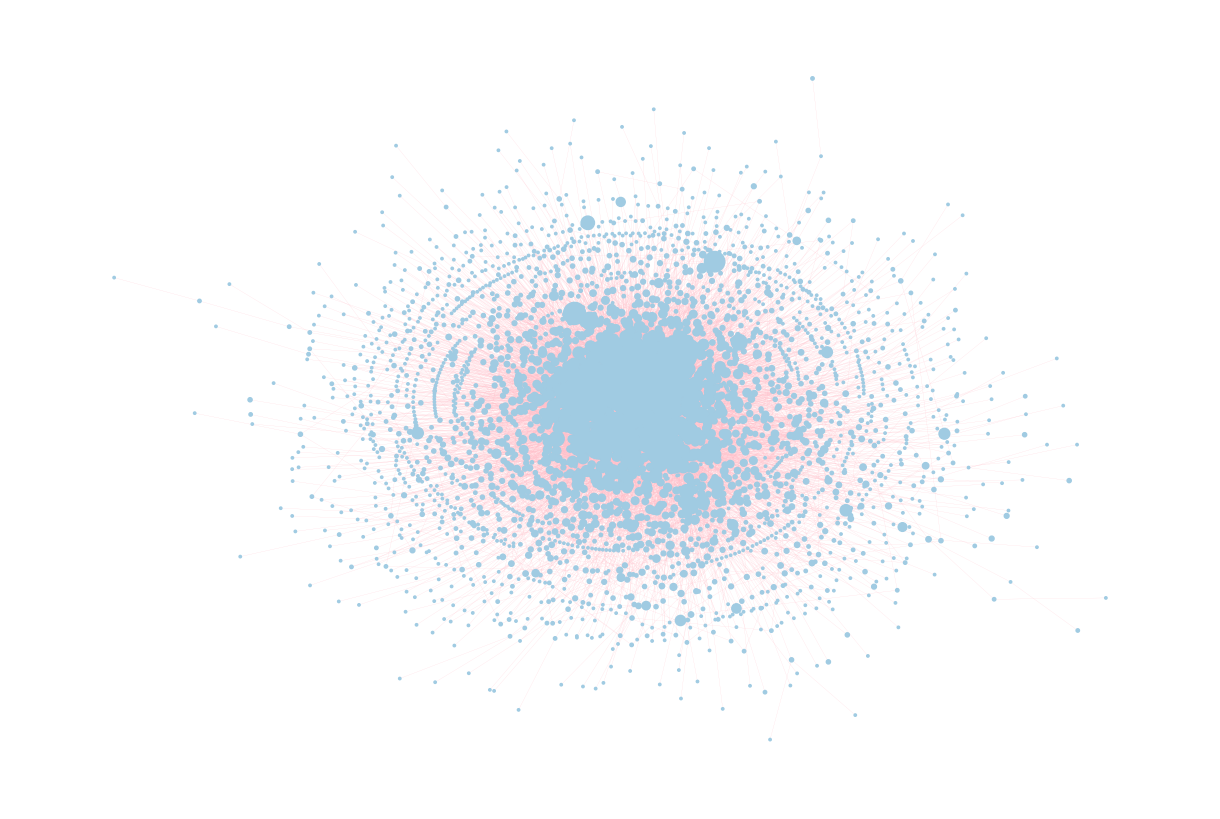

In [ ]:
#layout = nx.kamada_kawai_layout(G1)
layout = nx.spring_layout(G1)
plt.figure(figsize = (12, 8))
#nx.draw(G1, layout, node_color='#A0CBE2', edge_color = 'pink', width = 0.1, node_size = 3, edge_cmap = plt.cm.Blues)

# node size base on node degrees
nx.draw(G1, layout, node_color='#A0CBE2', edge_color = 'pink', width = 0.1, node_size = [v * 3 for v in node_degree.values()], edge_cmap = plt.cm.Blues)
plt.tight_layout()
plt.show()

In [27]:
# takes too long to run

from pyvis.network import Network
#net = Network(notebook = True, width = "800px", height = "700px", bgcolor = "#222222", font_color = "white")
net = Network(notebook=True)
net.from_nx(G1)
net.show("mygraph.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


KeyboardInterrupt: ignored

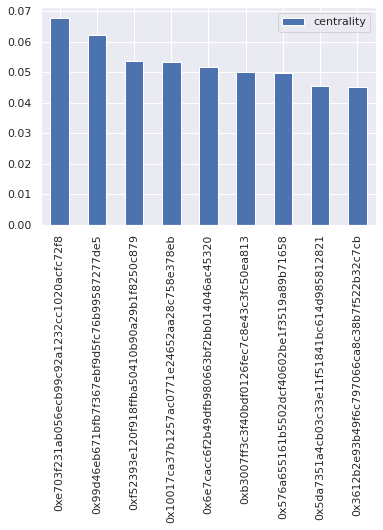

In [28]:
# degree centrality
degree_centrality = nx.degree_centrality(G1)
degree_df = pd.DataFrame.from_dict(degree_centrality, orient = 'index', columns = ['centrality'])
# plot top 10 nodes
degree_df.sort_values('centrality', ascending = False)[0:9].plot(kind = "bar")

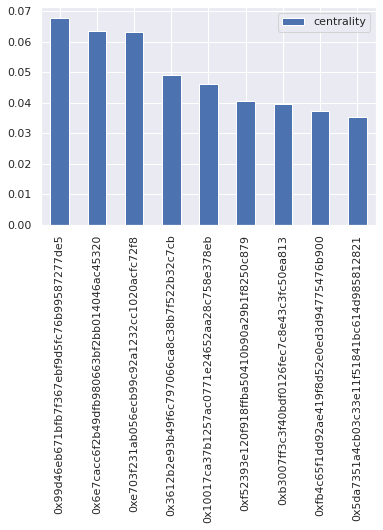

In [29]:
# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G1)
centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient = 'index', columns = ['centrality'])
# plot top 10 nodes
centrality_df.sort_values('centrality', ascending = False)[0:9].plot(kind = "bar")

In [ ]:
nx.set_node_attributes(G1, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G1, betweenness_centrality, 'betweenness_centrality')


In [ ]:
# community detection
import community as community_louvain

communities = community_louvain.best_partition(G1)
#print(communities)
#print(set(communities.values()))   # 48 communities
nx.set_node_attributes(G1, communities, 'group')

In [ ]:
# takes very long to render in browser
com_net = Network(notebook = True, width = "800px", height = "700px", bgcolor = "#222222", font_color = "white")
com_net.from_nx(G1)
com_net.show("communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [ ]:
import networkx.algorithms.community as nxcom
# another community detection method
communities = sorted(nxcom.greedy_modularity_communities(G1), key=len, reverse=True)
len(communities)

94

In [ ]:
#print(communities)  # returns frozensets

In [ ]:
#https://graphsandnetworks.com/community-detection-using-networkx/
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

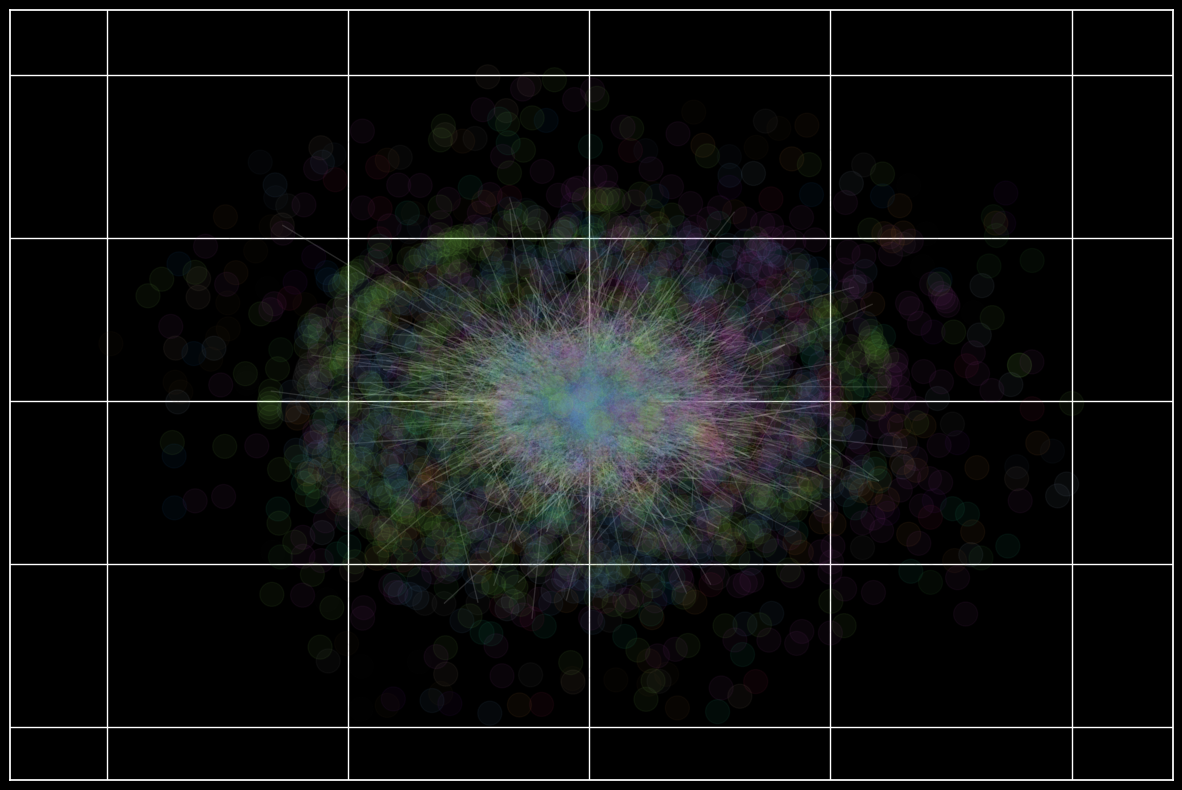

In [ ]:
pos = nx.spring_layout(G1, k=0.1)

plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G1, communities)
set_edge_community(G1)
# Set community color for internal edges
external = [(v, w) for v, w in G1.edges if G1.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G1.edges if G1.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G1.nodes[v]['community']) for v in G1.nodes]
# external edges
nx.draw_networkx(
    G1,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    G1, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)


##### Directed Graph: Buyer-seller Network

In [30]:
# network of trades, can use weight = total number of items the buyer bought from the seller (Nadini et al.)
G = nx.from_pandas_edgelist(sales_data, source = "buyer", target = "seller", create_using = nx.DiGraph())

In [31]:
print(nx.info(G))

DiGraph with 3052 nodes and 11326 edges


In [32]:
print("G is strongly connected: ", nx.is_strongly_connected(G))
print("G is weakly connected: ", nx.is_weakly_connected(G))

G is strongly connected:  False
G is weakly connected:  False


In [33]:
#reciprocity: the ratio of the number of edges in both directions to the total number of edges attached to node u
print(nx.overall_reciprocity(G))
nx.reciprocity(G, G.nodes())

0.018541409147095178


{'0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772': 0.0,
 '0x860c4604fe1125ea43f81e613e7afb2aa49546aa': 0.15384615384615385,
 '0x54d7f921785ebe46010d83c73712e80dfaff1e81': 0.0,
 '0xd0c0650cd08acd4e9553c48c60c94be04fecce43': 0.0,
 '0x6853a596d6d7264d3622546da3b891b6fe17eb82': 0.0,
 '0xf52393e120f918ffba50410b90a29b1f8250c879': 0.024096385542168676,
 '0x8a0a834077a8ecea4983e2288f81afb2c6764116': 0.0,
 '0xe923d07f58239356d4b1db37e03a22141f4f37c6': 0.0,
 '0xdc19d539369c3da9172de453c05bc503c9ac6bc2': 0.0,
 '0x55372173689c288552885d897d32f5f706f79aa6': 0.26666666666666666,
 '0xb3007ff3c3f40bdf0126fec7c8e43c3fc50ea813': 0.038461538461538464,
 '0x39cc9c86e67baf2129b80fe3414c397492ea8026': 0.0,
 '0xec6d36a487d85cf562b7b8464ce8dc60637362ac': 0.0,
 '0x4b3da60648f7d4eccee635b1200a1ad252ab10bb': 0.0,
 '0x5ab5844dd55ab73212d1527e4cf72fea884e39dd': 0.0,
 '0xe25c73435702fed11e9c5584ce6efe7cbff71739': 0.0,
 '0x5acce70cae148b520ff36dcf177ee78ba54ebc04': 0.0,
 '0xf8b32d30ac6ab3030595432533d7836fd76b078d': 0.0

In [34]:
degrees = dict(G.degree())
#print("Degrees (sum of in and out degrees): \n", degrees)
#print("In-degree: \n", dict(G.in_degree()))
#print("Out-degree: \n", dict(G.out_degree()))

print("\nmaximum degree: ", max(degrees.values()))
print("Max in degree: ", max(dict(G.in_degree()).values()))
print("Max out degree: ", max(dict(G.out_degree()).values()))


maximum degree:  210
Max in degree:  123
Max out degree:  203


In [35]:
print(f"The global clustering coefficient is {np.round(nx.transitivity(G), 4)}")


The global clustering coefficient is 0.0335


In [ ]:
# Compute the clustering coefficient for nodes
# print("Clsutering coefficient of all nodes: \n", nx.clustering(G))

In [36]:
# degree assortativity: measures the similarity of connections in the graph with respect to the node degree
nx.degree_assortativity_coefficient(G)

-0.030530749314069534

In [37]:
G.remove_edges_from(nx.selfloop_edges(G))
# returns the main core
core = nx.k_core(G)
nx.info(core)

'DiGraph with 108 nodes and 1525 edges'

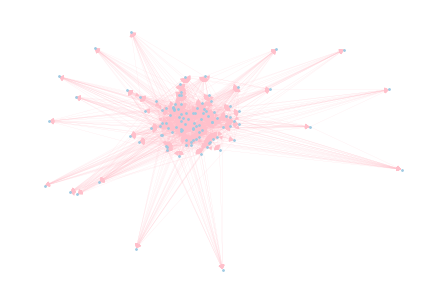

In [38]:
layout = nx.spring_layout(core)
nx.draw(core, layout, node_color='#A0CBE2', edge_color = 'pink', width = 0.1, node_size = 3, edge_cmap = plt.cm.Blues)
plt.show()

In [39]:

from pyvis.network import Network

#core.force_atlas_2based(gravity=-550)
#core.options.interaction.hideEdgesOnDrag = True
#core.show_buttons(filter_=['','nodes','interaction'])

net = Network(notebook=True, width = "800px", height = "700px")
net.from_nx(core)
net.show_buttons(filter_=True)
#net.show_buttons(filter_=['physics']) 
#net.repulsion()
net.show("core.html")



Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


max values:  210


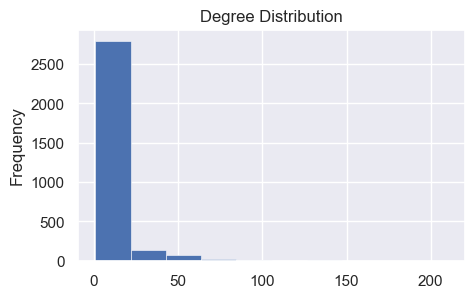

In [ ]:
degrees = dict(G.degree()).values()
print("max values: ", max(set(list(degrees))))

plt.figure(figsize = (5, 3))
plt.hist(degrees, linewidth = 0.4)
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

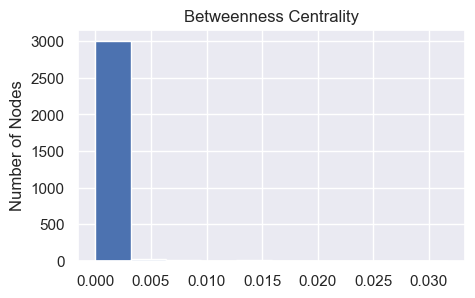

In [ ]:
betweenness = nx.betweenness_centrality(G)
#print("Betweenness centrality for each node of the network: ", betweenness)

plt.figure(figsize = (5, 3))
plt.hist(betweenness.values())
plt.ylabel('Number of Nodes')
plt.title('Betweenness Centrality')
plt.show()

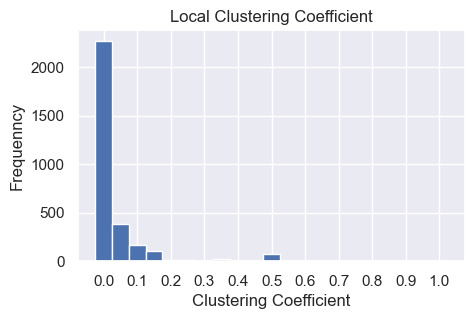

In [ ]:
local_clustering_coefficient = list(nx.clustering(G).values())

plt.figure(figsize = (5, 3))
plt.hist(local_clustering_coefficient, bins = np.arange(0, 1.1, 0.05) - 0.025)   # set bins to get center-aligned bins
plt.xticks(np.linspace(0, 1, 11))
plt.ylabel('Frequenncy')
plt.xlabel('Clustering Coefficient')
plt.title('Local Clustering Coefficient')
plt.show()

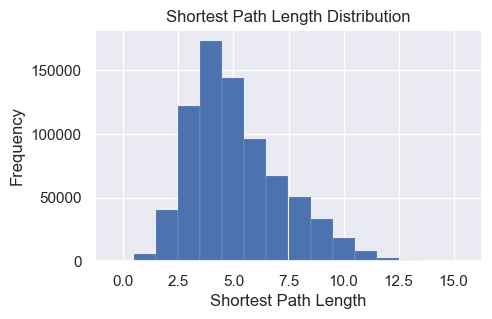

In [ ]:
all_paths = []
l = []
for i, elem in nx.shortest_path_length(G):
    for j in list(elem.values())[1:]:
        l.append(j)  # ignore path to itself
l.sort()
even = l[::2]  # keep only half of the duplicated values
all_paths.append(even)

max_num = np.max(max(all_paths)) # get the max of a list of list
#print("max: ", max_num)

plt.figure(figsize = (5, 3))
plt.hist(all_paths, bins = np.arange(max_num + 2) - 0.5, histtype = 'bar', linewidth = 0.1)
plt.ylabel('Frequency')
plt.xlabel('Shortest Path Length')
plt.title('Shortest Path Length Distribution')
plt.show()

In [ ]:
page_rank = nx.pagerank(G)
dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_harmonic_centrality = nx.harmonic_centrality(G)
dict_betweeness=nx.betweenness_centrality(G)

/var/folders/ks/myyrbw990ps2wwgnlcsd6scc0000gn/T/ipykernel_1648/897161486.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


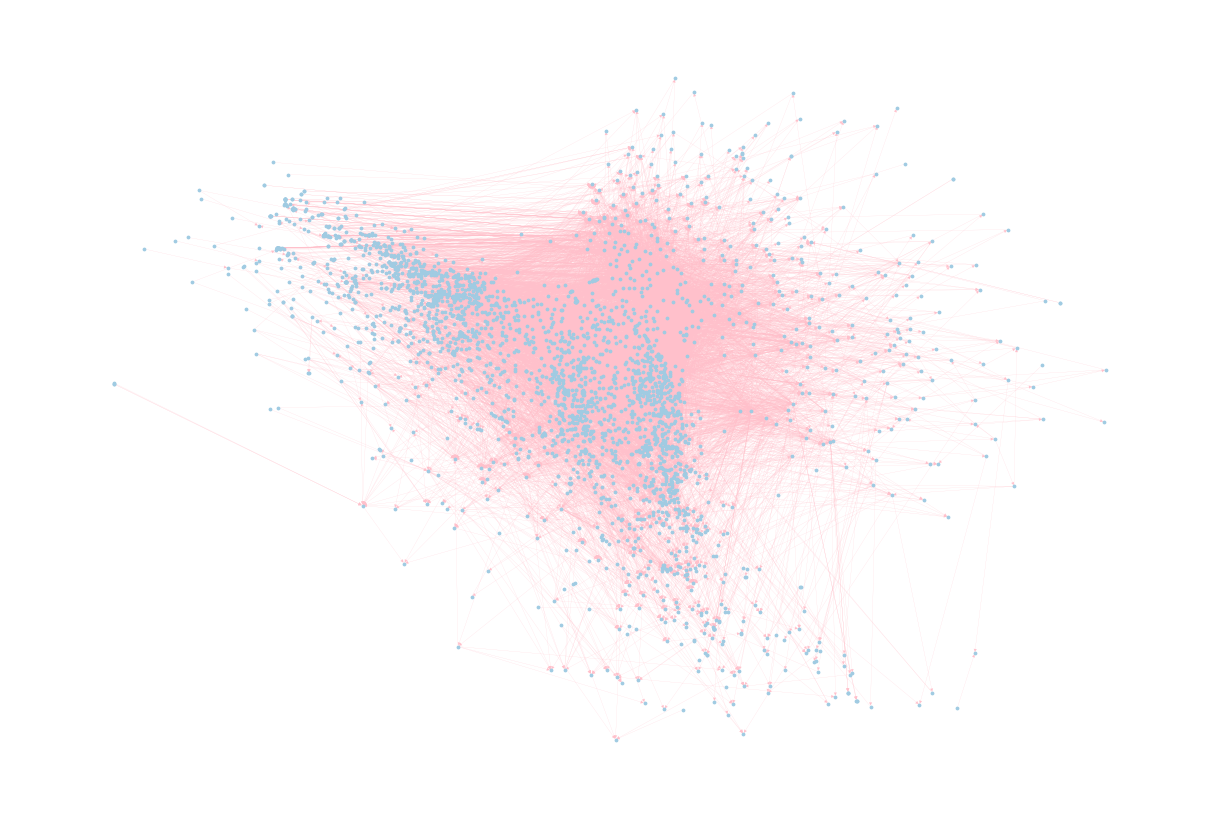

In [ ]:
layout = nx.kamada_kawai_layout(G)

plt.figure(figsize = (12, 8))

nx.draw(G, layout, node_color='#A0CBE2', edge_color = 'pink', width = 0.1, node_size = 3, 
        edge_cmap = plt.cm.Blues, arrowsize = 5)

plt.tight_layout()
#plt.savefig("./output/sales_graph.png") 
plt.show()